In [56]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
cancer_genes = pd.read_csv("../../COSMIC/Census_allTue Nov 10 13_38_57 2020.csv")
cancer_genes = cancer_genes["Gene Symbol"].tolist()

In [58]:
metabolomics_data = pd.read_csv("../MCF7_removal/Metabolomics_data_noMCF7.csv")
metabolomics_data = metabolomics_data.set_index("ionIdx")

In [59]:
celllines_mapped = pd.read_csv("../MCF7_removal/Celllines_mapping_manual_noMCF7.csv")
celllines_mutations = pd.read_csv("../../GEMICCL/Mutation.csv", sep = "\t")

# Get only cell lines with ID
celllines_mapped = celllines_mapped.drop_duplicates(subset = ["dsIdx"])
celllines_mapped = celllines_mapped.dropna(subset = ["ID"])
sample_data_tissue = celllines_mapped["DI"].tolist()

C:\Users\ds728\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [60]:
celllines_list = celllines_mapped["ID"].unique().tolist()

In [61]:
celllines_notinmutationset = set(celllines_list) - set(celllines_mutations['CellLineName_Cellosaurus'])
celllines_mapped_mutations = celllines_mapped[~celllines_mapped["ID"].isin(celllines_notinmutationset)]

In [62]:
metabolite_annotations = pd.read_csv("../../AZ_data/Metabolite_reference_table.csv")

In [63]:
gene_array = []

count = 1
#iterate through genes
for gene in cancer_genes:
    print("Calculating for " + gene + " %s/%s" % (str(count), str(len(cancer_genes))))
    count+=1
    ## Figure out which cell lines have mutations in the gene
    gene_of_interest = celllines_mutations[celllines_mutations["HGNC"] == gene]
    gene_of_interest = gene_of_interest[gene_of_interest["MutationType"] != "Silent"]
    gene_of_interest_celllines = set(gene_of_interest["CellLineName_Cellosaurus"])
    
    ## Get the cell lines with mutations
    cellines_with_mutation = celllines_mapped_mutations[celllines_mapped_mutations["ID"].isin(gene_of_interest_celllines)]["dsIdx"].tolist()
    cellines_without_mutation = celllines_mapped_mutations[~celllines_mapped_mutations["ID"].isin(gene_of_interest_celllines)]["dsIdx"].tolist()
    cellines_with_mutation = [str(x) for x in cellines_with_mutation]
    cellines_without_mutation = [str(x) for x in cellines_without_mutation]
    
    ## Get the metabolomics data
    metabolomics_data_drop = metabolomics_data.drop("ionMz", axis =1)
    metabolomics_data_drop = np.log10(metabolomics_data_drop)

    mutated_celllines = metabolomics_data_drop[cellines_with_mutation].transpose()
    nonmutated_celllines = metabolomics_data_drop[cellines_without_mutation].transpose()
    
 # If there are no mutations found then ignore this gene
    if mutated_celllines.empty:
        print("No mutations found for " + gene)
        continue
    
    
    
    mutated_mean = mutated_celllines.replace(-np.inf, np.nan).mean()
    nonmutated_mean = nonmutated_celllines.replace(-np.inf, np.nan).mean()
    
    mean_difference =  nonmutated_mean -mutated_mean
    mean_difference = mean_difference.rename(gene)
    
    gene_array.append(mean_difference)

Calculating for A1CF 1/723
Calculating for ABI1 2/723
Calculating for ABL1 3/723


C:\Users\ds728\anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
C:\Users\ds728\anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log10


Calculating for ABL2 4/723
Calculating for ACKR3 5/723
No mutations found for ACKR3
Calculating for ACSL3 6/723
Calculating for ACSL6 7/723
Calculating for ACVR1 8/723
Calculating for ACVR2A 9/723
Calculating for AFDN 10/723
No mutations found for AFDN
Calculating for AFF1 11/723
Calculating for AFF3 12/723
Calculating for AFF4 13/723
Calculating for AKAP9 14/723
Calculating for AKT1 15/723
Calculating for AKT2 16/723
No mutations found for AKT2
Calculating for AKT3 17/723
Calculating for ALDH2 18/723
Calculating for ALK 19/723
Calculating for AMER1 20/723
Calculating for ANK1 21/723
Calculating for APC 22/723
Calculating for APOBEC3B 23/723
Calculating for AR 24/723
Calculating for ARAF 25/723
Calculating for ARHGAP26 26/723
Calculating for ARHGAP5 27/723
Calculating for ARHGEF10 28/723
Calculating for ARHGEF10L 29/723
Calculating for ARHGEF12 30/723
Calculating for ARID1A 31/723
Calculating for ARID1B 32/723
Calculating for ARID2 33/723
Calculating for ARNT 34/723
Calculating for ASP

Calculating for FOXR1 268/723
Calculating for FSTL3 269/723
No mutations found for FSTL3
Calculating for FUBP1 270/723
No mutations found for FUBP1
Calculating for FUS 271/723
Calculating for GAS7 272/723
Calculating for GATA1 273/723
Calculating for GATA2 274/723
Calculating for GATA3 275/723
Calculating for GLI1 276/723
Calculating for GMPS 277/723
Calculating for GNA11 278/723
Calculating for GNAQ 279/723
Calculating for GNAS 280/723
Calculating for GOLGA5 281/723
Calculating for GOPC 282/723
Calculating for GPC3 283/723
Calculating for GPC5 284/723
Calculating for GPHN 285/723
Calculating for GRIN2A 286/723
Calculating for GRM3 287/723
Calculating for H3F3A 288/723
Calculating for H3F3B 289/723
Calculating for HERPUD1 290/723
Calculating for HEY1 291/723
Calculating for HIF1A 292/723
Calculating for HIP1 293/723
Calculating for HIST1H3B 294/723
Calculating for HIST1H4I 295/723
Calculating for HLA-A 296/723
Calculating for HLF 297/723
Calculating for HMGA1 298/723
Calculating for HM

Calculating for PRDM1 519/723
Calculating for PRDM16 520/723
Calculating for PRDM2 521/723
Calculating for PREX2 522/723
Calculating for PRF1 523/723
Calculating for PRKACA 524/723
Calculating for PRKAR1A 525/723
Calculating for PRKCB 526/723
Calculating for PRPF40B 527/723
Calculating for PRRX1 528/723
Calculating for PSIP1 529/723
Calculating for PTCH1 530/723
Calculating for PTEN 531/723
Calculating for PTK6 532/723
Calculating for PTPN11 533/723
Calculating for PTPN13 534/723
Calculating for PTPN6 535/723
Calculating for PTPRB 536/723
Calculating for PTPRC 537/723
Calculating for PTPRD 538/723
Calculating for PTPRK 539/723
Calculating for PTPRT 540/723
Calculating for PWWP2A 541/723
Calculating for QKI 542/723
Calculating for RABEP1 543/723
Calculating for RAC1 544/723
Calculating for RAD17 545/723
No mutations found for RAD17
Calculating for RAD21 546/723
Calculating for RAD51B 547/723
No mutations found for RAD51B
Calculating for RAF1 548/723
Calculating for RALGDS 549/723
Calcul

In [64]:
combined_array = pd.concat(gene_array, axis =1)

In [66]:
combined_array.head()

,A1CF,ABI1,ABL1,ABL2,ACSL3,ACSL6,ACVR1,ACVR2A,AFF1,AFF3,...,ZFHX3,ZMYM2,ZMYM3,ZNF331,ZNF384,ZNF429,ZNF479,ZNF521,ZNRF3,ZRSR2
ionIdx,,,,,,,,,,,,,,,,,,,,,
1,-0.006672,0.006577,-0.016414,-0.013945,-0.048314,-0.009305,-0.025435,-0.010030,-0.036586,-0.004064,...,0.010967,0.014868,-0.015292,-0.006350,0.015403,-0.002459,-0.034195,0.020043,-0.039670,-0.021291
2,0.012898,-0.040020,0.008421,-0.017743,0.151952,-0.009463,-0.013327,-0.089152,0.020822,-0.043243,...,-0.035264,-0.108724,0.033758,-0.028069,-0.060242,-0.061957,-0.033663,-0.016443,0.078814,0.054568
3,-0.062972,0.006525,-0.059576,-0.039331,-0.039254,-0.009487,-0.036860,-0.056206,-0.040227,-0.003191,...,-0.031363,-0.036101,-0.046040,0.020901,-0.080430,-0.054486,-0.008816,-0.083023,-0.084690,-0.152692
4,-0.037395,0.025295,-0.034098,-0.006238,-0.113350,0.015192,0.002045,-0.009332,-0.046090,0.005418,...,-0.014992,-0.046107,-0.026935,0.021210,-0.036228,-0.020011,-0.007033,-0.007317,-0.049259,-0.069382
5,-0.012385,0.019338,0.073740,0.013561,-0.044159,0.077822,-0.078024,0.021424,-0.044237,0.002484,...,0.040799,0.056307,0.000869,-0.007309,0.017314,-0.010230,-0.018983,0.014090,0.007444,0.081512


In [67]:
combined_array["FH"]

ionIdx
1       0.007193
2      -0.032207
3      -0.059884
4      -0.042396
5      -0.108123
          ...   
1095    0.015130
1096    0.382701
1097    0.004502
1098    0.003027
1099    0.030749
Name: FH, Length: 1099, dtype: float64

In [68]:
combined_array.to_csv("Differential_expression_mutations.csv")

In [69]:
differential_array = combined_array

In [70]:
tstat_array = pd.read_csv("../Mutation_regression/OLS_tissue_controlled_regressionTstats_noMCF7.csv", index_col = "Unnamed: 0")

In [71]:
tstat_array

,T_A1CF,T_ABI1,T_ABL1,T_ABL2,T_ACSL3,T_ACSL6,T_ACVR1,T_ACVR2A,T_AFF1,T_AFF3,...,T_ZMYM3,T_ZNF331,T_ZNF384,T_ZNF429,T_ZNF479,T_ZNF521,T_ZNRF3,T_ZRSR2,T_STK11.1,T_KEAP1.1
1,0.512,-1.411,0.820,0.965,1.062,0.819,1.636,0.406,2.722,-0.033,...,0.709,0.146,-0.380,-0.068,2.859,-1.630,1.854,0.363,-0.696,-0.119
2,-0.717,0.131,-0.478,-0.526,-1.938,-1.302,0.695,0.664,-2.435,1.229,...,-0.598,-1.078,0.378,-0.007,0.488,0.858,-0.352,-0.813,0.320,-0.878
3,4.089,-1.856,2.502,2.380,0.433,0.437,1.715,0.913,1.878,0.053,...,1.354,-1.655,0.865,0.899,1.003,3.796,3.286,2.629,-0.280,2.450
4,2.491,-1.549,1.566,0.412,1.760,-0.144,0.205,0.515,3.425,0.119,...,0.903,-0.927,0.194,0.948,1.234,0.376,1.619,1.253,-0.132,0.753
5,1.690,-1.875,-1.367,-0.445,0.498,-3.144,3.060,-1.079,2.092,-0.496,...,0.426,-0.249,-0.382,0.765,0.269,-1.725,0.790,-0.955,0.464,1.899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-1.478,-0.983,2.628,-0.130,2.124,3.727,-1.970,-0.691,-2.864,-1.769,...,-1.567,1.667,0.374,4.238,1.901,-2.139,-0.182,-0.500,5.101,-1.182
1096,3.084,-3.491,-0.026,0.319,-1.155,2.897,-3.322,-3.216,-2.406,-2.742,...,-1.524,4.066,-0.121,-0.538,-1.456,-2.254,-0.281,0.011,-1.999,-1.700
1097,-1.422,-1.013,-1.836,8.034,-2.382,-3.233,2.700,0.218,1.093,-0.351,...,-2.770,7.673,-2.782,-0.686,1.912,-1.992,-1.927,-1.477,6.480,7.699
1098,0.493,-0.783,1.186,1.395,2.422,2.337,-3.228,-2.723,-1.300,-0.236,...,-2.038,2.777,1.432,7.701,-0.390,3.943,2.689,-1.609,1.319,0.862


C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


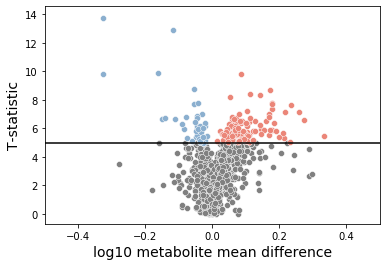

In [72]:
genename = "ATM"

red = "#EB8678"
blue = "#8BAFCF"

xvalues = differential_array[genename]
yvalues = tstat_array["T_" + genename]
yvalues = abs(yvalues)
plotting_frame = pd.concat([xvalues, yvalues], axis =1)

plotting_frame_sig = plotting_frame[plotting_frame["T_" + genename] >= 5]
plotting_frame_sig_low = plotting_frame_sig[plotting_frame_sig[genename] <0]
plotting_frame_sig_high = plotting_frame_sig[plotting_frame_sig[genename] >0]

plotting_frame_nonsig = plotting_frame[plotting_frame["T_" + genename] < 5]



g = sns.scatterplot(plotting_frame_nonsig[genename], plotting_frame_nonsig["T_" + genename], color = "grey")
g2 = sns.scatterplot(plotting_frame_sig_high[genename], plotting_frame_sig_high["T_" + genename], color = red)
g2 = sns.scatterplot(plotting_frame_sig_low[genename], plotting_frame_sig_low["T_" + genename], color = blue)




g.set_xlim(-0.5,0.5)
g.set_xlabel("log10 metabolite mean difference", size = 14)
g.set_ylabel("T-statistic", size= 14)

g.axhline(5, color = "black")

index_significant = plotting_frame_sig.index.tolist()
significant_metabolites = metabolite_annotations[metabolite_annotations["ionIdx"].isin(index_significant)]["name"]

plt.savefig(genename + "_volcano_v1.pdf", bbox_inches = "tight")

In [73]:
for item in significant_metabolites:
    print(item)

Glycine
Beta-Alanine
L-Alanine
Sarcosine
D-Alanine
L-Serine
D-Serine
1-Pyrroline-5-carboxylic acid
1-Pyrroline-2-carboxylic acid
Dihydrouracil
N-Methylhydantoin
Caproic acid
Isocaproic acid
L-Threonine
L-Homoserine
L-Allothreonine
Benzoic acid
4-Hydroxybenzaldehyde
Hydroxyproline
N-Acetyl-L-alanine
Propionylglycine
5-Aminolevulinic acid
L-Glutamic-gamma-semialdehyde
3-Hydroxy-L-proline
4-Hydroxy-L-proline
5-Amino-2-oxopentanoic acid
Ureidopropionic acid
L-Asparagine
Glycyl-glycine
N-Carbamoylsarcosine
4-Nitrophenol
6-Hydroxynicotinic acid
3-Hydroxypicolinic acid
Isobutyrylglycine
N-Butyrylglycine
Allysine
4-Acetamidobutanoic acid
(S)-5-Amino-3-oxohexanoate
2-Keto-6-aminocaproate
Oxoglutaric acid
Coumarin
Phenylpropiolic acid
Hydrocinnamic acid
4-Ethylbenzoic acid
3-Methylphenylacetic acid
3,4-Dimethylbenzoic acid
4-Coumaryl alcohol
2-Phenylpropionate
Xanthine
Oxypurinol
6,8-Dihydroxypurine
Dopamine
p-Octopamine
Vanillylamine
Oenanthic ether
Pelargonic acid
N(6)-Methyllysine
Isoputreani

C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


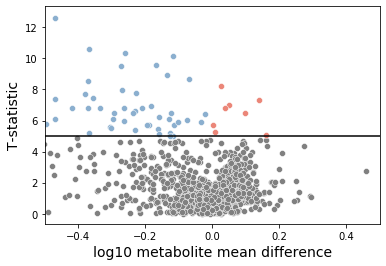

In [74]:
genename = "IDH1"

red = "#EB8678"
blue = "#8BAFCF"

xvalues = differential_array[genename]
yvalues = tstat_array["T_" + genename]
yvalues = abs(yvalues)
plotting_frame = pd.concat([xvalues, yvalues], axis =1)

plotting_frame_sig = plotting_frame[plotting_frame["T_" + genename] >= 5]
plotting_frame_sig_low = plotting_frame_sig[plotting_frame_sig[genename] <0]
plotting_frame_sig_high = plotting_frame_sig[plotting_frame_sig[genename] >0]

plotting_frame_nonsig = plotting_frame[plotting_frame["T_" + genename] < 5]



g = sns.scatterplot(plotting_frame_nonsig[genename], plotting_frame_nonsig["T_" + genename], color = "grey")
g2 = sns.scatterplot(plotting_frame_sig_high[genename], plotting_frame_sig_high["T_" + genename], color = red)
g2 = sns.scatterplot(plotting_frame_sig_low[genename], plotting_frame_sig_low["T_" + genename], color = blue)




g.set_xlim(-0.5,0.5)
g.set_xlabel("log10 metabolite mean difference", size = 14)
g.set_ylabel("T-statistic", size= 14)

g.axhline(5, color = "black")

index_significant = plotting_frame_sig.index.tolist()
significant_metabolites = metabolite_annotations[metabolite_annotations["ionIdx"].isin(index_significant)]["name"]

plt.savefig(genename + "_volcano_v1.pdf", bbox_inches = "tight")

In [75]:
for item in significant_metabolites:
    print(item)

2-Pyrrolidinone
2-Hydroxybutyric acid
(R)-3-Hydroxybutyric acid
(S)-3-Hydroxyisobutyric acid
(R)-3-Hydroxyisobutyric acid
3-Hydroxybutyric acid
(S)-3-Hydroxybutyric acid
4-Hydroxybutyric acid
Alpha-Hydroxyisobutyric acid
Histamine
1-Pyrroline-5-carboxylic acid
1-Pyrroline-2-carboxylic acid
Acetylglycine
L-2-Amino-3-oxobutanoic acid
L-Aspartate-semialdehyde
Betaine
L-Valine
Vaporole
N-Methyl-a-aminoisobutyric acid
5-Aminopentanoic acid
Glutaconic acid
Citraconic acid
Mesaconic acid
Itaconic acid
Gamma-delta-Dioxovaleric acid
Hydroxyproline
N-Acetyl-L-alanine
Propionylglycine
5-Aminolevulinic acid
L-Glutamic-gamma-semialdehyde
3-Hydroxy-L-proline
4-Hydroxy-L-proline
5-Amino-2-oxopentanoic acid
L-Isoleucine
L-Alloisoleucine
L-Leucine
L-Norleucine
Aminocaproic acid
Beta-Leucine
Vinylacetylglycine
Isobutyrylglycine
N-Butyrylglycine
Allysine
4-Acetamidobutanoic acid
(S)-5-Amino-3-oxohexanoate
2-Keto-6-aminocaproate
Citramalic acid
3-Hydroxyglutaric acid
D-2-Hydroxyglutaric acid
L-2-Hydroxygl

C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


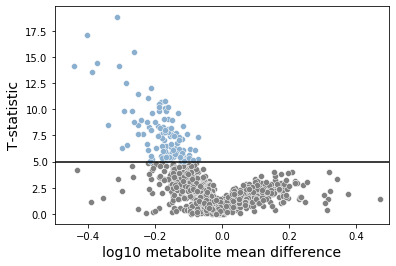

In [76]:
genename = "SDHB"

red = "#EB8678"
blue = "#8BAFCF"

xvalues = differential_array[genename]
yvalues = tstat_array["T_" + genename]
yvalues = abs(yvalues)
plotting_frame = pd.concat([xvalues, yvalues], axis =1)

plotting_frame_sig = plotting_frame[plotting_frame["T_" + genename] >= 5]
plotting_frame_sig_low = plotting_frame_sig[plotting_frame_sig[genename] <0]
plotting_frame_sig_high = plotting_frame_sig[plotting_frame_sig[genename] >0]

plotting_frame_nonsig = plotting_frame[plotting_frame["T_" + genename] < 5]



g = sns.scatterplot(plotting_frame_nonsig[genename], plotting_frame_nonsig["T_" + genename], color = "grey")
g2 = sns.scatterplot(plotting_frame_sig_high[genename], plotting_frame_sig_high["T_" + genename], color = red)
g2 = sns.scatterplot(plotting_frame_sig_low[genename], plotting_frame_sig_low["T_" + genename], color = blue)




g.set_xlim(-0.5,0.5)
g.set_xlabel("log10 metabolite mean difference", size = 14)
g.set_ylabel("T-statistic", size= 14)

g.axhline(5, color = "black")

index_significant = plotting_frame_sig.index.tolist()
significant_metabolites = metabolite_annotations[metabolite_annotations["ionIdx"].isin(index_significant)]["name"]

plt.savefig(genename + "_volcano_v1.pdf", bbox_inches = "tight")

In [77]:
for item in significant_metabolites:
    print(item)

Butyric acid
Isobutyric acid
Acetoin
trans-1,2-Dihydrobenzene-1,2-diol
p-Hydroxyphenylacetic acid
3-Hydroxyphenylacetic acid
Ortho-Hydroxyphenylacetic acid
Mandelic acid
p-Anisic acid
3-Cresotinic acid
3,4-Dihydroxyphenylacetaldehyde
4-Hydroxy-3-methylbenzoic acid
Vanillin
cis-4-Hydroxycyclohexylacetic acid
trans-4-Hydroxycyclohexylacetic acid
3-Oxooctanoic acid
Alpha-Ketooctanoic acid
2-Methylbutyrylglycine
Isovalerylglycine
Valerylglycine
N-Acetylvaline
3-Dehydrocarnitine
5-Acetamidovalerate
3-Methyladipic acid
Pimelic acid
3,3-Dimethylglutaric acid
Suberic acid
Ethyladipic acid
3-Oxodecanoic acid
Azelaic acid
Nonate
cis-4-Decenedioic acid
cis-4-Decenedioic acid
cis-5-Decenedioic acid
Dodecanoic acid
Capryloylglycine
Valproylglycine
Sebacic acid
Tridecanoic acid
Undecanedioic acid
Gamma-glutamyl-L-putrescine
Monoisobutyl phthalic acid
Monobutylphthalate
5,8-Tetradecadienoic acid
5-Tetradecenoic acid
5Z-Tetradecenoic acid
Myristoleic acid
Tsuzuic acid
trans-Tetra-dec-2-enoic acid
Trau

C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


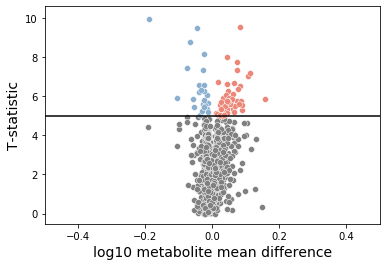

In [78]:
genename = "HIF1A"

red = "#EB8678"
blue = "#8BAFCF"

xvalues = differential_array[genename]
yvalues = tstat_array["T_" + genename]
yvalues = abs(yvalues)
plotting_frame = pd.concat([xvalues, yvalues], axis =1)

plotting_frame_sig = plotting_frame[plotting_frame["T_" + genename] >= 5]
plotting_frame_sig_low = plotting_frame_sig[plotting_frame_sig[genename] <0]
plotting_frame_sig_high = plotting_frame_sig[plotting_frame_sig[genename] >0]

plotting_frame_nonsig = plotting_frame[plotting_frame["T_" + genename] < 5]



g = sns.scatterplot(plotting_frame_nonsig[genename], plotting_frame_nonsig["T_" + genename], color = "grey")
g2 = sns.scatterplot(plotting_frame_sig_high[genename], plotting_frame_sig_high["T_" + genename], color = red)
g2 = sns.scatterplot(plotting_frame_sig_low[genename], plotting_frame_sig_low["T_" + genename], color = blue)




g.set_xlim(-0.5,0.5)
g.set_xlabel("log10 metabolite mean difference", size = 14)
g.set_ylabel("T-statistic", size= 14)

g.axhline(5, color = "black")

index_significant = plotting_frame_sig.index.tolist()
significant_metabolites = metabolite_annotations[metabolite_annotations["ionIdx"].isin(index_significant)]["name"]

plt.savefig(genename + "_volcano_v1.pdf", bbox_inches = "tight")

In [79]:
for item in significant_metabolites:
    print(item)

Beta-Alanine
L-Alanine
Sarcosine
D-Alanine
L-Serine
D-Serine
Pyrocatechol
Hydroquinone
Caproic acid
Isocaproic acid
L-Threonine
L-Homoserine
L-Allothreonine
2-Methyl-3-ketovaleric acid
3-Methyl-2-oxovaleric acid
Ketoleucine
2-Ketohexanoic acid
Mevalonolactone
3-Oxohexanoic acid
Adipate semialdehyde
L-Aspartic acid
D-Aspartic acid
Iminodiacetate
Acetylphosphate
Phosphonoacetate
Isobutyrylglycine
N-Butyrylglycine
Allysine
4-Acetamidobutanoic acid
(S)-5-Amino-3-oxohexanoate
2-Keto-6-aminocaproate
Oxoglutaric acid
Coumarin
Phenylpropiolic acid
7-Methylguanine
3-Methylguanine
1-Methylguanine
N2-Methylguanine
Homogentisic acid
Vanillic acid
3-Hydroxymandelic acid
p-Hydroxymandelic acid
3,4-Dihydroxybenzeneacetic acid
5-Methoxysalicylic acid
3,4-Dihydroxymandelaldehyde
2-Octenedioic acid
cis-4-Octenedioic acid
trans-3-Octenedioic acid
4-Nitrocatechol
2,4-Dihydroxy-nitrophenol
Phosphohydroxypyruvic acid
Vanylglycol
Glutarylglycine
N-Acetylglutamic acid
3-Hydroxysuberic acid
Phosphoguanidinoace

C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


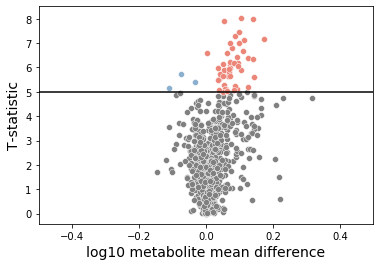

In [80]:
genename = "TP53"

red = "#EB8678"
blue = "#8BAFCF"

xvalues = differential_array[genename]
yvalues = tstat_array["T_" + genename]
yvalues = abs(yvalues)
plotting_frame = pd.concat([xvalues, yvalues], axis =1)

plotting_frame_sig = plotting_frame[plotting_frame["T_" + genename] >= 5]
plotting_frame_sig_low = plotting_frame_sig[plotting_frame_sig[genename] <0]
plotting_frame_sig_high = plotting_frame_sig[plotting_frame_sig[genename] >0]

plotting_frame_nonsig = plotting_frame[plotting_frame["T_" + genename] < 5]



g = sns.scatterplot(plotting_frame_nonsig[genename], plotting_frame_nonsig["T_" + genename], color = "grey")
g2 = sns.scatterplot(plotting_frame_sig_high[genename], plotting_frame_sig_high["T_" + genename], color = red)
g2 = sns.scatterplot(plotting_frame_sig_low[genename], plotting_frame_sig_low["T_" + genename], color = blue)




g.set_xlim(-0.5,0.5)
g.set_xlabel("log10 metabolite mean difference", size = 14)
g.set_ylabel("T-statistic", size= 14)

g.axhline(5, color = "black")

index_significant = plotting_frame_sig.index.tolist()
significant_metabolites = metabolite_annotations[metabolite_annotations["ionIdx"].isin(index_significant)]["name"]

plt.savefig(genename + "_volcano_v1.pdf", bbox_inches = "tight")

In [81]:
for item in significant_metabolites:
    print(item)

Pyrrole-2-carboxylic acid
L-Malic acid
Malic acid
N-Acetyl-L-glutamate 5-semialdehyde
Ureidosuccinic acid
Carnosine
(6R)-6-(L-Erythro-1,2-Dihydroxypropyl)-5,6,7,8-tetrahydro-4a-hydroxypterin
Palmitaldehyde
Inosine
Allopurinol riboside
Arabinosylhypoxanthine
Homovanillic acid sulfate
Glycineamideribotide
Beta-Citryl-L-glutamic acid
Hesperetin
MG(P-18:0e/0:0/0:0)
MG(18:0e/0:0/0:0)
6-Hydroxy-5-methoxyindole glucuronide
5-Hydroxy-6-methoxyindole glucuronide
Topiramate
Sphingosine 1-phosphate
CPA(18:1(11Z)/0:0)
CPA(18:1(9Z)/0:0)
Alpha-Tocopherol
LPA(0:0/18:1(9Z))
LPA(18:1(9Z)/0:0)
DHAP(18:0)
PE(P-16:0e/0:0)
LysoPC(16:0)
LysoPC(P-16:0)
LysoPE(0:0/20:1(11Z))
LysoPE(20:1(11Z)/0:0)
LysoPC(18:1(9Z))
LysoPC(18:1(11Z))
LysoPC(O-18:0)
O-6-deoxy-a-L-galactopyranosyl-(1->2)-O-b-D-galactopyranosyl-(1->3)-2-(acetylamino)-1,5-anhydro-2-deoxy-D-arabino-Hex-1-enitol
O-6-deoxy-a-L-galactopyranosyl-(1->2)-O-b-D-galactopyranosyl-(1->4)-2-(acetylamino)-1,5-anhydro-2-deoxy-D-arabino-Hex-1-enitol
LysoPE(0:0/22:

C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


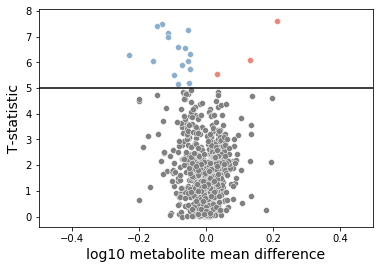

In [82]:
genename = "PIK3CA"

red = "#EB8678"
blue = "#8BAFCF"

xvalues = differential_array[genename]
yvalues = tstat_array["T_" + genename]
yvalues = abs(yvalues)
plotting_frame = pd.concat([xvalues, yvalues], axis =1)

plotting_frame_sig = plotting_frame[plotting_frame["T_" + genename] >= 5]
plotting_frame_sig_low = plotting_frame_sig[plotting_frame_sig[genename] <0]
plotting_frame_sig_high = plotting_frame_sig[plotting_frame_sig[genename] >0]

plotting_frame_nonsig = plotting_frame[plotting_frame["T_" + genename] < 5]



g = sns.scatterplot(plotting_frame_nonsig[genename], plotting_frame_nonsig["T_" + genename], color = "grey")
g2 = sns.scatterplot(plotting_frame_sig_high[genename], plotting_frame_sig_high["T_" + genename], color = red)
g2 = sns.scatterplot(plotting_frame_sig_low[genename], plotting_frame_sig_low["T_" + genename], color = blue)




g.set_xlim(-0.5,0.5)
g.set_xlabel("log10 metabolite mean difference", size = 14)
g.set_ylabel("T-statistic", size= 14)

g.axhline(5, color = "black")

index_significant = plotting_frame_sig.index.tolist()
significant_metabolites = metabolite_annotations[metabolite_annotations["ionIdx"].isin(index_significant)]["name"]

plt.savefig(genename + "_volcano_v1.pdf", bbox_inches = "tight")

In [83]:
for item in significant_metabolites:
    print(item)

Pyruvaldehyde
Malondialdehyde
Fumaric acid
Maleic acid
L-Malic acid
Malic acid
O-Phosphoethanolamine
2,5-Furandicarboxylic acid
L-Fucose
Rhamnose
1,5-Anhydrosorbitol
Beta-D-Fucose
L-Rhamnulose
2-Deoxygalactopyranose
Galactitol
Sorbitol
Mannitol
L-Iditol
Epinephrine
Normetanephrine
Methylnoradrenaline
Mannitol 1-phosphate
Sorbitol-6-phosphate
N-Acetylneuraminic acid
N-Acetyl-a-neuraminic acid
N-Oleoylethanolamine
Stearoylethanolamide
N,N-Dimethylsphingosine
CDP-Ethanolamine
LysoPC(15:0)
LysoPE(0:0/18:0)
LysoPE(18:0/0:0)
SM(d18:1/14:0)
PE(20:2(11Z,14Z)/P-18:1(11Z))
PE(20:2(11Z,14Z)/P-18:1(9Z))
PE(20:3(5Z,8Z,11Z)/P-18:0)
PE(20:3(8Z,11Z,14Z)/P-18:0)
PE(P-18:0/20:3(5Z,8Z,11Z))
PE(P-18:0/20:3(8Z,11Z,14Z))
PE(P-18:1(11Z)/20:2(11Z,14Z))
PE(P-18:1(9Z)/20:2(11Z,14Z))
Malonyl-CoA
PIP(16:0/20:2(11Z,14Z))
PIP(18:0/18:2(9Z,12Z))
PIP(18:1(11Z)/18:1(11Z))
PIP(18:1(11Z)/18:1(9Z))
PIP(18:1(9Z)/18:1(11Z))
PIP(18:1(9Z)/18:1(9Z))
PIP(18:2(9Z,12Z)/18:0)
PIP(20:2(11Z,14Z)/16:0)
Galabiosylceramide (d18:1/22:0

C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


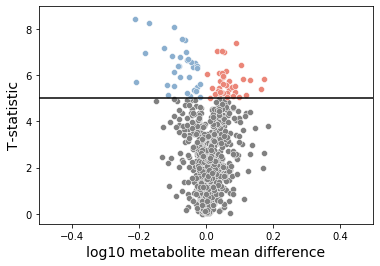

In [84]:
genename = "APC"

red = "#EB8678"
blue = "#8BAFCF"

xvalues = differential_array[genename]
yvalues = tstat_array["T_" + genename]
yvalues = abs(yvalues)
plotting_frame = pd.concat([xvalues, yvalues], axis =1)

plotting_frame_sig = plotting_frame[plotting_frame["T_" + genename] >= 5]
plotting_frame_sig_low = plotting_frame_sig[plotting_frame_sig[genename] <0]
plotting_frame_sig_high = plotting_frame_sig[plotting_frame_sig[genename] >0]

plotting_frame_nonsig = plotting_frame[plotting_frame["T_" + genename] < 5]



g = sns.scatterplot(plotting_frame_nonsig[genename], plotting_frame_nonsig["T_" + genename], color = "grey")
g2 = sns.scatterplot(plotting_frame_sig_high[genename], plotting_frame_sig_high["T_" + genename], color = red)
g2 = sns.scatterplot(plotting_frame_sig_low[genename], plotting_frame_sig_low["T_" + genename], color = blue)




g.set_xlim(-0.5,0.5)
g.set_xlabel("log10 metabolite mean difference", size = 14)
g.set_ylabel("T-statistic", size= 14)

g.axhline(5, color = "black")

index_significant = plotting_frame_sig.index.tolist()
significant_metabolites = metabolite_annotations[metabolite_annotations["ionIdx"].isin(index_significant)]["name"]

plt.savefig(genename + "_volcano_v1.pdf", bbox_inches = "tight")

In [85]:
for item in significant_metabolites:
    print(item)

Beta-Alanine
L-Alanine
Sarcosine
D-Alanine
Creatinine
Hydroxyproline
N-Acetyl-L-alanine
Propionylglycine
5-Aminolevulinic acid
L-Glutamic-gamma-semialdehyde
3-Hydroxy-L-proline
4-Hydroxy-L-proline
5-Amino-2-oxopentanoic acid
2-Hydroxyadipic acid
3-Hydroxyadipic acid
3-Hydroxymethylglutaric acid
2(R)-Hydroxyadipic acid
Glucosan
Gallic acid
D-Glucose
D-Galactose
D-Mannose
Myoinositol
3-Deoxyarabinohexonic acid
Beta-D-Glucose
D-Fructose
Allose
L-Sorbose
Alpha-D-Glucose
D-Tagatose
Beta-D-Galactose
Scyllitol
L-Gulose
Glutarylglycine
N-Acetylglutamic acid
D-Glucuronic acid
Galacturonic acid
Iduronic acid
Pectic acid
Pectin
3-Dehydro-L-gulonate
5-Keto-D-gluconate
2-Keto-L-gluconate
O-Ureidohomoserine
Phosphocreatine
Topaquinone
Carnosine
(6R)-6-(L-Erythro-1,2-Dihydroxypropyl)-5,6,7,8-tetrahydro-4a-hydroxypterin
N'-Formylkynurenine
Palmitaldehyde
Erythrohydrobupropion
Inositol cyclic phosphate
Palmitic acid
Trimethyltridecanoic acid
Fructose 6-phosphate
Myo-inositol 1-phosphate
Galactose 1-pho

C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


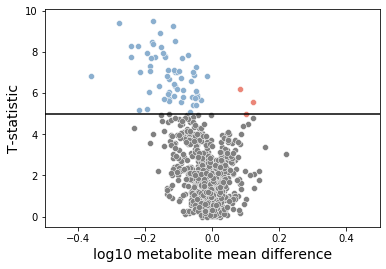

In [86]:
genename = "KEAP1"

red = "#EB8678"
blue = "#8BAFCF"

xvalues = differential_array[genename]
yvalues = tstat_array["T_" + genename]
yvalues = abs(yvalues)
plotting_frame = pd.concat([xvalues, yvalues], axis =1)

plotting_frame_sig = plotting_frame[plotting_frame["T_" + genename] >= 5]
plotting_frame_sig_low = plotting_frame_sig[plotting_frame_sig[genename] <0]
plotting_frame_sig_high = plotting_frame_sig[plotting_frame_sig[genename] >0]

plotting_frame_nonsig = plotting_frame[plotting_frame["T_" + genename] < 5]



g = sns.scatterplot(plotting_frame_nonsig[genename], plotting_frame_nonsig["T_" + genename], color = "grey")
g2 = sns.scatterplot(plotting_frame_sig_high[genename], plotting_frame_sig_high["T_" + genename], color = red)
g2 = sns.scatterplot(plotting_frame_sig_low[genename], plotting_frame_sig_low["T_" + genename], color = blue)




g.set_xlim(-0.5,0.5)
g.set_xlabel("log10 metabolite mean difference", size = 14)
g.set_ylabel("T-statistic", size= 14)

g.axhline(5, color = "black")

index_significant = plotting_frame_sig.index.tolist()
significant_metabolites = metabolite_annotations[metabolite_annotations["ionIdx"].isin(index_significant)]["name"]

plt.savefig(genename + "_volcano_v1.pdf", bbox_inches = "tight")

In [87]:
for item in significant_metabolites:
    print(item)

Dimethylglycine
Gamma-Aminobutyric acid
L-Alpha-aminobutyric acid
D-Alpha-aminobutyric acid
2-Aminoisobutyric acid
(S)-b-aminoisobutyric acid
(R)-b-aminoisobutyric acid
3-Aminoisobutanoic acid
Hypotaurine
Homocysteine thiolactone
Methylimidazole acetaldehyde
Trigonelline
2-Aminobenzoic acid
p-Aminobenzoic acid
3-Pyridylacetic acid
m-Aminobenzoic acid
3,4-Dihydroxybenzylamine
Vinylacetylglycine
4-Guanidinobutanoic acid
L-Canaline
Homocysteinesulfinic acid
Glycylproline
L-prolyl-L-glycine
Cysteinylglycine
Isoxanthopterin
Nicotinuric acid
Homovanillic acid
Isohomovanillic acid
3,4-Dihydroxyhydrocinnamic acid
Hydroxyphenyllactic acid
3-(3-hydroxyphenyl)-3-hydroxypropanoic acid
3-Methoxy-4-hydroxyphenylglycolaldehyde
N-Acetyl-L-methionine
2-Oxoarginine
4-Aminohippuric acid
Ureidosuccinic acid
L-Acetylcarnitine
5-L-Glutamyl-taurine
Daidzein
6-Succinoaminopurine
Ethenodeoxyadenosine
Alpha-CEHC
Monoethylhexyl phthalic acid
Apigenin
Genistein
Glutathione
Epicatechin
Catechin
Hawkinsin
1-(sn-Gly

C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


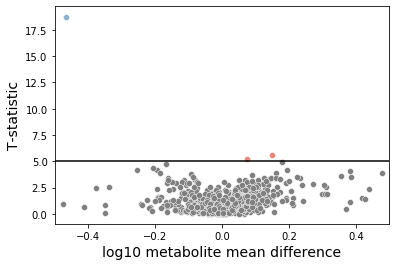

In [88]:
genename = "FH"

red = "#EB8678"
blue = "#8BAFCF"

xvalues = differential_array[genename]
yvalues = tstat_array["T_" + genename]
yvalues = abs(yvalues)
plotting_frame = pd.concat([xvalues, yvalues], axis =1)

plotting_frame_sig = plotting_frame[plotting_frame["T_" + genename] >= 5]
plotting_frame_sig_low = plotting_frame_sig[plotting_frame_sig[genename] <0]
plotting_frame_sig_high = plotting_frame_sig[plotting_frame_sig[genename] >0]

plotting_frame_nonsig = plotting_frame[plotting_frame["T_" + genename] < 5]



g = sns.scatterplot(plotting_frame_nonsig[genename], plotting_frame_nonsig["T_" + genename], color = "grey")
g2 = sns.scatterplot(plotting_frame_sig_high[genename], plotting_frame_sig_high["T_" + genename], color = red)
g2 = sns.scatterplot(plotting_frame_sig_low[genename], plotting_frame_sig_low["T_" + genename], color = blue)




g.set_xlim(-0.5,0.5)
g.set_xlabel("log10 metabolite mean difference", size = 14)
g.set_ylabel("T-statistic", size= 14)

g.axhline(5, color = "black")

index_significant = plotting_frame_sig.index.tolist()
significant_metabolites = metabolite_annotations[metabolite_annotations["ionIdx"].isin(index_significant)]["name"]

plt.savefig(genename + "_volcano_v1.pdf", bbox_inches = "tight")

In [89]:
for item in significant_metabolites:
    print(item)

Ureidosuccinic acid
Cer(d18:0/12:0)
Malonyl-CoA
Galabiosylceramide (d18:1/22:0)
Lactosylceramide (d18:1/22:0)


C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


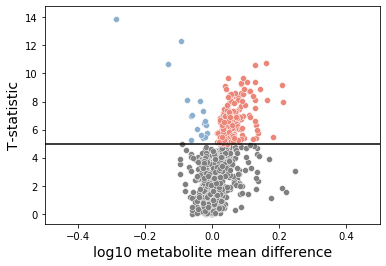

In [90]:
genename = "KRAS"

red = "#EB8678"
blue = "#8BAFCF"

xvalues = differential_array[genename]
yvalues = tstat_array["T_" + genename]
yvalues = abs(yvalues)
plotting_frame = pd.concat([xvalues, yvalues], axis =1)

plotting_frame_sig = plotting_frame[plotting_frame["T_" + genename] >= 5]
plotting_frame_sig_low = plotting_frame_sig[plotting_frame_sig[genename] <0]
plotting_frame_sig_high = plotting_frame_sig[plotting_frame_sig[genename] >0]

plotting_frame_nonsig = plotting_frame[plotting_frame["T_" + genename] < 5]



g = sns.scatterplot(plotting_frame_nonsig[genename], plotting_frame_nonsig["T_" + genename], color = "grey")
g2 = sns.scatterplot(plotting_frame_sig_high[genename], plotting_frame_sig_high["T_" + genename], color = red)
g2 = sns.scatterplot(plotting_frame_sig_low[genename], plotting_frame_sig_low["T_" + genename], color = blue)




g.set_xlim(-0.5,0.5)
g.set_xlabel("log10 metabolite mean difference", size = 14)
g.set_ylabel("T-statistic", size= 14)

g.axhline(5, color = "black")

index_significant = plotting_frame_sig.index.tolist()
significant_metabolites = metabolite_annotations[metabolite_annotations["ionIdx"].isin(index_significant)]["name"]

plt.savefig(genename + "_volcano_v1.pdf", bbox_inches = "tight")

In [91]:
plotting_frame_sig.sort_values(by = "KRAS")

,KRAS,T_KRAS
245,-0.287660,13.917
516,-0.132947,10.681
110,-0.094194,12.329
231,-0.075393,8.141
679,-0.062662,5.240
...,...,...
1036,0.160739,10.763
1034,0.163765,8.127
990,0.181896,5.472
1072,0.208254,9.183


In [92]:
for item in significant_metabolites:
    print(item)

Acrylamide
Glycine
2-Pyrrolidinone
Beta-Alanine
L-Alanine
Sarcosine
D-Alanine
L-Serine
D-Serine
Imidazole-4-acetaldehyde
Histamine
Creatinine
Dihydrouracil
N-Methylhydantoin
Caproic acid
Isocaproic acid
Betaine
L-Valine
Vaporole
N-Methyl-a-aminoisobutyric acid
5-Aminopentanoic acid
3-Hydroxy-2-methyl-[R-(R,S)]-butanoic acid
2-Methyl-3-hydroxybutyric acid
2-Ethylhydracrylic acid
2-Hydroxy-3-methylbutyric acid
3-Hydroxy-2-methyl-[S-(R,R)]-butanoic acid
3-Hydroxyvaleric acid
Erythronilic acid
3-Hydroxyisovaleric acid
2-Hydroxyvaleric acid
2-Hydroxy-2-methylbutyric acid
4-Hydroxyisovaleric acid
L-Threonine
L-Homoserine
L-Allothreonine
Benzoic acid
4-Hydroxybenzaldehyde
Dihydrothymine
L-Isoleucine
L-Alloisoleucine
L-Leucine
L-Norleucine
Aminocaproic acid
Beta-Leucine
Ureidopropionic acid
L-Asparagine
Glycyl-glycine
N-Carbamoylsarcosine
4-Nitrophenol
6-Hydroxynicotinic acid
3-Hydroxypicolinic acid
Isobutyrylglycine
N-Butyrylglycine
Allysine
4-Acetamidobutanoic acid
(S)-5-Amino-3-oxohexanoate

C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


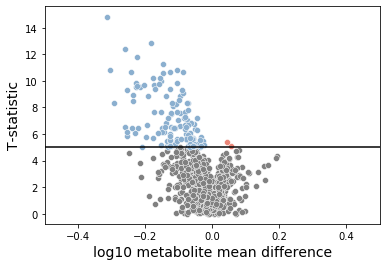

In [99]:
genename = "STK11"

red = "#EB8678"
blue = "#8BAFCF"

xvalues = differential_array[genename]
yvalues = tstat_array["T_" + genename]
yvalues = abs(yvalues)
plotting_frame = pd.concat([xvalues, yvalues], axis =1)

plotting_frame_sig = plotting_frame[plotting_frame["T_" + genename] >= 5]
plotting_frame_sig_low = plotting_frame_sig[plotting_frame_sig[genename] <0]
plotting_frame_sig_high = plotting_frame_sig[plotting_frame_sig[genename] >0]

plotting_frame_nonsig = plotting_frame[plotting_frame["T_" + genename] < 5]



g = sns.scatterplot(plotting_frame_nonsig[genename], plotting_frame_nonsig["T_" + genename], color = "grey")
g2 = sns.scatterplot(plotting_frame_sig_high[genename], plotting_frame_sig_high["T_" + genename], color = red)
g2 = sns.scatterplot(plotting_frame_sig_low[genename], plotting_frame_sig_low["T_" + genename], color = blue)




g.set_xlim(-0.5,0.5)
g.set_xlabel("log10 metabolite mean difference", size = 14)
g.set_ylabel("T-statistic", size= 14)

g.axhline(5, color = "black")

index_significant = plotting_frame_sig.index.tolist()
significant_metabolites = metabolite_annotations[metabolite_annotations["ionIdx"].isin(index_significant)]["name"]

plt.savefig(genename + "_volcano_v1.pdf", bbox_inches = "tight")

In [100]:
for item in significant_metabolites:
    print(item)

Isovaleric acid
Valeric acid
Ethylmethylacetic acid
Hypotaurine
3-Furoic acid
2-Furoic acid
Dihydrouracil
N-Methylhydantoin
Betaine
L-Valine
Vaporole
N-Methyl-a-aminoisobutyric acid
5-Aminopentanoic acid
Taurine
L-Isoleucine
L-Alloisoleucine
L-Leucine
L-Norleucine
Aminocaproic acid
Beta-Leucine
Ureidopropionic acid
L-Asparagine
Glycyl-glycine
N-Carbamoylsarcosine
3,4-Dihydroxybenzylamine
Phosphoglycolic acid
Oxoadipic acid
3-Oxoadipic acid
4-(3-Pyridyl)-3-butenoic acid
3-Methyldioxyindole
L-Phenylalanine
3-Pyridinebutanoic acid
Benzocaine
Norsalsolinol
L-Arginine
D-Arginine
L-Carnitine
Citric acid
Isocitric acid
D-threo-Isocitric acid
Diketogulonic acid
2,3-Diketo-L-gulonate
Salicyluric acid
Dopaquinone
4-Carboxyphenylglycine
Alpha-Hydroxyhippuric acid
Leucodopachrome
3-Hydroxyhippuric acid
L-Tryptophan
D-Tryptophan
Phosphocreatine
Topaquinone
Vanillactic acid
3-Oxotetradecanoic acid
5-L-Glutamyl-taurine
Daidzein
Mannitol 1-phosphate
Sorbitol-6-phosphate
D-Glucuronic acid 1-phosphate
A

C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


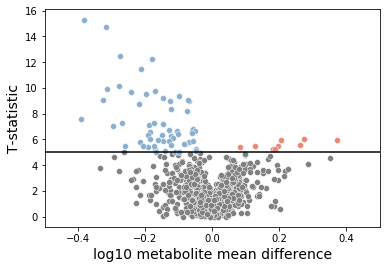

In [97]:
genename = "NFE2L2"

red = "#EB8678"
blue = "#8BAFCF"

xvalues = differential_array[genename]
yvalues = tstat_array["T_" + genename]
yvalues = abs(yvalues)
plotting_frame = pd.concat([xvalues, yvalues], axis =1)

plotting_frame_sig = plotting_frame[plotting_frame["T_" + genename] >= 5]
plotting_frame_sig_low = plotting_frame_sig[plotting_frame_sig[genename] <0]
plotting_frame_sig_high = plotting_frame_sig[plotting_frame_sig[genename] >0]

plotting_frame_nonsig = plotting_frame[plotting_frame["T_" + genename] < 5]



g = sns.scatterplot(plotting_frame_nonsig[genename], plotting_frame_nonsig["T_" + genename], color = "grey")
g2 = sns.scatterplot(plotting_frame_sig_high[genename], plotting_frame_sig_high["T_" + genename], color = red)
g2 = sns.scatterplot(plotting_frame_sig_low[genename], plotting_frame_sig_low["T_" + genename], color = blue)




g.set_xlim(-0.5,0.5)
g.set_xlabel("log10 metabolite mean difference", size = 14)
g.set_ylabel("T-statistic", size= 14)

g.axhline(5, color = "black")

index_significant = plotting_frame_sig.index.tolist()
significant_metabolites = metabolite_annotations[metabolite_annotations["ionIdx"].isin(index_significant)]["name"]

plt.savefig(genename + "_volcano_v1.pdf", bbox_inches = "tight")

In [98]:
for item in significant_metabolites:
    print(item)

Glycine
Beta-Alanine
L-Alanine
Sarcosine
D-Alanine
Uracil
Homocysteine thiolactone
Acetylglycine
L-2-Amino-3-oxobutanoic acid
L-Aspartate-semialdehyde
Methylimidazole acetaldehyde
Taurine
Thymine
Imidazoleacetic acid
2-Keto-glutaramic acid
Ribitol
D-Arabitol
L-Arabitol
D-Xylitol
L-Canaline
Oxoadipic acid
3-Oxoadipic acid
7-Methylguanine
3-Methylguanine
1-Methylguanine
N2-Methylguanine
Homocysteinesulfinic acid
Uric acid
Homogentisic acid
Vanillic acid
3-Hydroxymandelic acid
p-Hydroxymandelic acid
3,4-Dihydroxybenzeneacetic acid
5-Methoxysalicylic acid
3,4-Dihydroxymandelaldehyde
Glycylproline
L-prolyl-L-glycine
Cysteinylglycine
Isoxanthopterin
Nicotinuric acid
Vanylglycol
4-Aminohippuric acid
Glycerylphosphorylethanolamine
Pantothenic acid
N-Decanoylglycine
Hydroxypropionylcarnitine
5-Methyldeoxycytidine
Tetrahydrobiopterin
Sapropterin
Inositol cyclic phosphate
5,6-Dihydrouridine
L-alpha-Aspartyl-L-hydroxyproline
Gamma-Glutamylcysteine
6-Succinoaminopurine
Fructose 6-phosphate
Myo-inos

C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


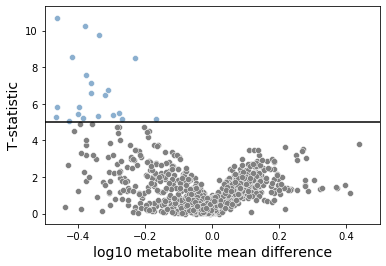

In [101]:
genename = "MYC"

red = "#EB8678"
blue = "#8BAFCF"

xvalues = differential_array[genename]
yvalues = tstat_array["T_" + genename]
yvalues = abs(yvalues)
plotting_frame = pd.concat([xvalues, yvalues], axis =1)

plotting_frame_sig = plotting_frame[plotting_frame["T_" + genename] >= 5]
plotting_frame_sig_low = plotting_frame_sig[plotting_frame_sig[genename] <0]
plotting_frame_sig_high = plotting_frame_sig[plotting_frame_sig[genename] >0]

plotting_frame_nonsig = plotting_frame[plotting_frame["T_" + genename] < 5]



g = sns.scatterplot(plotting_frame_nonsig[genename], plotting_frame_nonsig["T_" + genename], color = "grey")
g2 = sns.scatterplot(plotting_frame_sig_high[genename], plotting_frame_sig_high["T_" + genename], color = red)
g2 = sns.scatterplot(plotting_frame_sig_low[genename], plotting_frame_sig_low["T_" + genename], color = blue)




g.set_xlim(-0.5,0.5)
g.set_xlabel("log10 metabolite mean difference", size = 14)
g.set_ylabel("T-statistic", size= 14)

g.axhline(5, color = "black")

index_significant = plotting_frame_sig.index.tolist()
significant_metabolites = metabolite_annotations[metabolite_annotations["ionIdx"].isin(index_significant)]["name"]

plt.savefig(genename + "_volcano_v1.pdf", bbox_inches = "tight")